# Fall 2018 - Course and Professor Evaluations (CAPE)

In [1]:
# ---------IMPORTS---------
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Reading in a Table

We can create an instance of a `Table` (`datascience.tables`) with the [Table()](http://data8.org/datascience/_autosummary/datascience.tables.Table.__init__.html#datascience.tables.Table.__init__) method and fill our table with data from the `fall_18_cape.csv` comma-separated values (CSV) file using the [read_table()](http://data8.org/datascience/_autosummary/datascience.tables.Table.read_table.html#datascience.tables.Table.read_table) method:
> `Table.read_table(filepath_or_buffer, *args, **vargs)`
>
> Read a table from a file or web address.
>
> * filepath_or_buffer – string or file handle / StringIO; The string could be a URL. Valid URL schemes include http, ftp, s3, and file.

Here is an example of what a `.csv` file might look like:

![(CSV) Excel vs TextEdit](./images/csv_comparison.jpg)

In [2]:
table = Table().read_table('./data/fall_18_cape.csv')

# Print out our newly created table.
table

Course No,Section,Instructor,Enrollment,Responses,Percent
AIP 197T,A00,"Wienhausen, Gabriele",8,2,25.00%
ANAR 113,A00,"Ben-Yosef, Erez",19,11,57.89%
ANAR 146,A00,"D'Alpoim Guedes, Jade A",39,17,43.59%
ANBI 100,A00,"Marchetto, Maria Carolina",25,23,92.00%
ANBI 134,A00,"Non, Amy L",30,16,53.33%
ANBI 135,A01,"Non, Amy L",11,7,63.64%
ANBI 159,A00,"Lew, Caroline Horton",45,25,55.56%
ANSC 100,A00,"Goodman, Yehuda Chaim",12,4,33.33%
ANSC 100,C00,"Jenkins, Janis A.",11,5,45.45%
ANSC 105,A00,"Saravia, Paula F",20,17,85.00%


Number of rows and columns in our Table

In [3]:
print('# of rows:', table.num_rows)
print('# of columns:', table.num_columns)

# of rows: 3189
# of columns: 6


Python uses 0-based indexing so lets print out the last valid row entry just for fun. :)

In [4]:
table.row(table.num_rows - 1)

Row(Course No='WCWP 10B', Section='4', Instructor='Gagnon, Jeffrey C', Enrollment=15, Responses=4, Percent='26.67%')

In [5]:
try:
    table.row(table.num_rows)
except:
    print("The command 'table.row(table.num_rows)' produced an error!")

The command 'table.row(table.num_rows)' produced an error!


## Counting the Number of Departments

### Question 1

The first question that comes to my mind is:
> Q1: How many departments at UCSD offered any courses during the Fall 2018 quarter?

### Question 2

First, let us identity the unqiue number of courses offered *within* a specific department. (We will come back to Q1 later.)

For example:
> Q2: How many Math courses where offered during the Fall 2018 Quarter.

The `datascience.tables.Table` class contains the [where](http://data8.org/datascience/_autosummary/datascience.tables.Table.where.html#datascience.tables.Table.where) function that lets us query information about our table using [predicates](http://data8.org/datascience/predicates.html).

We can call the `where` function on our variable `table` with the predicate `are.containing(substring)` to return a *new* table with only the rows that contain `substring` as a substring in a specific column.

**Note**: We cannot use the `are.equal_to(y)` predicate function since the **'Course No'** column, as shown above, contains a string of both the course department (MATH, CSE, etc.) and the course number (100, 20C, etc.) and clearly the string 'MATH' does **not** equal to 'MATH 100A'.

In [6]:
math_table = table.where('Course No', are.containing('MATH'))

# Print out our newly created table.
math_table

Course No,Section,Instructor,Enrollment,Responses,Percent
MATH 100A,A01,"Popescu, Cristian D.",28,17,60.71%
MATH 100A,A02,"Popescu, Cristian D.",21,10,47.62%
MATH 100A,A03,"Popescu, Cristian D.",23,9,39.13%
MATH 100A,B01,"Varma, Ila K",27,6,22.22%
MATH 102,A01,"Green, Nathan E",33,13,39.39%
MATH 102,A02,"Green, Nathan E",30,7,23.33%
MATH 102,A03,"Green, Nathan E",33,15,45.45%
MATH 102,A04,"Green, Nathan E",32,13,40.63%
MATH 102,A05,"Green, Nathan E",29,14,48.28%
MATH 102,A06,"Green, Nathan E",29,12,41.38%


Here we see all the rows that have 'MATH' as a subtring in the 'Course No' column. However, as shown above, there are duplicates since there can be different professors teaching the same course. Furthermore, courses are broken down into smaller sections (A01, B02, etc.) in order to distinguish between different discussion sections. This means that we need to find a way to remove the duplicates in our table.

Fortunately, the [numpy](https://www.numpy.org/) package contains the [numpy.unique](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.unique.html) function:
> `numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)`
>
> Find the unique elements of an array.  
> * Returns:
    * The sorted unique elements of an array.
> * There are three optional outputs in addition to the unique elements: 
    * the indices of the input array that give the unique values
    * the indices of the unique array that reconstruct the input array
    * the number of times each unique value comes up in the input array

Let us use the `numpy.unique` function to identity the number of unique courses offered within the Math department. The [numpy.ndarray](https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.ndarray.html) class has the [numpy.ndarray.size](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.size.html) attribute that returns the number of elements in our 1-dimensional array.

Note that we saved our new table as `math_table` after calling the `where` function on our original `table`.

### Answer: Question 2

In [7]:
# 1. Get the 'Course No' column as an array from our math table.
math_course_column = math_table.column('Course No')

# 2. Get the unique math course numbers.
unique_math_courses = np.unique(math_course_column)

# 3. Print results.
print("There were", unique_math_courses.size, "unique math courses offered at UCSD during the Fall 2018 Quarter:\n")

print(unique_math_courses)

There were 35 unique math courses offered at UCSD during the Fall 2018 Quarter:

['MATH 100A' 'MATH 102' 'MATH 103A' 'MATH 104A' 'MATH 109' 'MATH 10A'
 'MATH 10B' 'MATH 10C' 'MATH 11' 'MATH 110A' 'MATH 111A' 'MATH 120A'
 'MATH 140A' 'MATH 142A' 'MATH 150A' 'MATH 153' 'MATH 157' 'MATH 170A'
 'MATH 174' 'MATH 18' 'MATH 180A' 'MATH 181B' 'MATH 183' 'MATH 184A'
 'MATH 2' 'MATH 20A' 'MATH 20B' 'MATH 20C' 'MATH 20D' 'MATH 20E'
 'MATH 31AH' 'MATH 3C' 'MATH 4C' 'MATH 87' 'MATH 96']


### Question 3

Now that we understand the issues we had to overcome in Q2, we are ready to answer another question:
> Q3: How many unique courses, under *any* department, were offered during the Fall 2018 quarter?

Answering this question will further guide our understanding to solving our orignal question from earlier (Q1).

Similarly, we get the 'Course No' column but this time from our original `table` and call the `numpy.unique` function on the colum array.

**Note**: Since we expect there to be *many* different unique courses offered this fall quarter, we will only print out up to `print_limit` elements in our array.

### Answer: Question 3

In [8]:
# 1. Get the 'Course No' column from our table.
courses_column = table.column('Course No')

# 2. Store the unique course numbers
unique_courses = np.unique(courses_column)

# 3. Print results.
print("There were", unique_courses.size, "unique courses offered at UCSD during the Fall 2018 Quarter:\n")

# Print out only a certain number of unique courses.
print_limit = 35
print('Here are the first ', print_limit, ":\n", unique_courses[0:print_limit], sep='')

There were 901 unique courses offered at UCSD during the Fall 2018 Quarter:

Here are the first 35:
['AIP 197T' 'ANAR 113' 'ANAR 146' 'ANBI 100' 'ANBI 134' 'ANBI 135'
 'ANBI 159' 'ANSC 100' 'ANSC 105' 'ANSC 106' 'ANSC 118' 'ANSC 146'
 'ANSC 148' 'ANSC 175' 'ANTH 101' 'ANTH 196A' 'ANTH 21' 'ANTH 23' 'ANTH 3'
 'ANTH 87' 'AWP 1' 'AWP 2A' 'AWP 2B' 'BENG 110' 'BENG 119A' 'BENG 122A'
 'BENG 126A' 'BENG 127A' 'BENG 128A' 'BENG 134' 'BENG 135' 'BENG 141'
 'BENG 147A' 'BENG 148A' 'BENG 149A']


### Question 1 (Revisited)

Now that we have solved Q2 and Q3, we are ready to tackle Q1:
> Q1: How many departments offered any courses during the Fall 2018 quarter?

We know that we have to remove the duplicates from our 'Course No' column and then call the `numpy.unique` function on our array of course departments.

However, 'MATH 100A' and 'MATH 20D' would not be considered the same, even though they are from the same department. This means that we have to somehow parse the department of each entry in the 'Course No' column. How can we do this? 

Luckily, we have the [apply](http://data8.org/datascience/_autosummary/datascience.tables.Table.apply.html#datascience.tables.Table.apply) method for Tables:
> `Table.apply(fn, *column_or_columns)`
>
> Apply fn to each element or elements of column_or_columns. If no column_or_columns provided, fn is applied to each row.  
> * Returns:
    * An array consisting of results of applying fn to elements specified by column_label in each row.
> * Args:
    * fn (function) – The function to apply. column_or_columns: Columns containing the arguments to fn as either column labels (str) or column indices (int). The number of columns must match the number of arguments that fn expects.

* First, we must create a function, call it `A`, that is able to **split strings** of the form 'MATH 100A' for each entry in the 'Course No' column to get 'MATH'.
* We will pass in our function `A` to the `apply()` function which will return an array of all the departments.
* Then we must call the `numpy.unique` function, since 'MATH 100A' and 'MATH 20B' will both return the string 'MATH'.

## Splitting Strings

Strings in python have the `str.split()` function:
>`str.split(sep=None, maxsplit=-1)`
>
> Return a list of the words in the string, using sep as the delimiter string.
> * If maxsplit is given, at most maxsplit splits are done (thus, the list will have at most maxsplit+1 elements).
> * If maxsplit is not specified or -1, then there is no limit on the number of splits (all possible splits are made).
>
> * If sep is given, consecutive delimiters are not grouped together and are deemed to delimit empty strings (for example, '1,,2'.split(',') returns ['1', '', '2']). The sep argument may consist of multiple characters (for example, '1<>2<>3'.split('<>') returns ['1', '2', '3']). Splitting an empty string with a specified separator returns [''].
> * If sep is not specified or is None, a different splitting algorithm is applied: runs of consecutive whitespace are regarded as a single separator, and the result will contain no empty strings at the start or end if the string has leading or trailing whitespace.

### Examples of `split()` function

In [9]:
test_string = "ONE1 TWO1 THREE1"

# Split into an array based on delimiter.

print(test_string.split())

print(test_string.split(' ')) # Same as previous call

print(test_string.split('E'))

print(test_string.split('1'))

# Returning index value from splitted array.

print(test_string.split()[0])

print(test_string.split()[1])

print(test_string.split()[2])

['ONE1', 'TWO1', 'THREE1']
['ONE1', 'TWO1', 'THREE1']
['ON', '1 TWO1 THR', '', '1']
['ONE', ' TWO', ' THREE', '']
ONE1
TWO1
THREE1


### Planning our parsing function
* We will create a function named `parse_course_no()` that takes two arguments, a `string` and an `index`:
    * The `string` variable will hold each entry in the 'Course No' column.
    * The `index` variable will have a default value of 0 which represents what value in our array, returned by `split()`, we will return.
* Since the entries in the 'Course No' column are seperated by a space, we do not have to specify sep.

**Note**: Python uses 0-based indexing so `array[0]` returns the first value in an array called `array`. We would like to add this option in the case that we would like to know the the second value in our array (i.e. Is the course an upper/lower division course?).

In [10]:
def parse_course_no(string, index = 0):
    '''
    
    Given a string of the format 'MATH 100A', we split the string using
    the split method which returns an array. Depending on the index
    value passed in, we return the value for that index in the array.
    
    >>> parse_course_no('MATH 100A') # Default index value = 0.
    'MATH'
    
    >>> parse_course_no('MATH 100A', 0) # Same as previous call.
    'MATH'
    
    >>> parse_course_no('MATH 100A', 1) # Return value at index 1.
    '100A'
    
    '''
    string_array = string.split()
    index_value = string_array[index]
    return index_value

Now that we have define our `parse_course_no()` function, let us make sure that it works.

### Testing `parse_course_no()` function

In [11]:
sample_string = 'MATH 100A'

print(parse_course_no(sample_string))

print(parse_course_no(sample_string, 0))

print(parse_course_no(sample_string, 1))

MATH
MATH
100A


### Answer: Question 1

Now let us call the `apply()` function on our variable `table` with the `parse_course_no()` function and the 'Course No' column name as arguments.

In [12]:
# 1. Parse the course departments from the table.
course_departments = table.apply(parse_course_no, 'Course No')

# 2. Get the unique departments.
unique_departments = np.unique(course_departments)

# 3. Print results.
print("There were", unique_departments.size, "departments that offered courses during the Fall 2018 Quarter:\n")

print_limit = 50
print('Here are the first ', print_limit, ":\n", unique_departments[0:print_limit], sep='')

There were 104 departments that offered courses during the Fall 2018 Quarter:

Here are the first 50:
['AIP' 'ANAR' 'ANBI' 'ANSC' 'ANTH' 'AWP' 'BENG' 'BIBC' 'BICD' 'BIEB'
 'BILD' 'BIMM' 'BIPN' 'BISP' 'CAT' 'CENG' 'CGS' 'CHEM' 'CHIN' 'COGS'
 'COMM' 'CSE' 'DOC' 'DSC' 'DSGN' 'ECE' 'ECON' 'EDS' 'ENG' 'ENVR' 'ERC'
 'ESYS' 'ETHN' 'FILM' 'FMPH' 'GLBH' 'HDP' 'HIAF' 'HIEA' 'HIEU' 'HILA'
 'HILD' 'HINE' 'HISC' 'HITO' 'HIUS' 'HUM' 'INTL' 'JAPN' 'JUDA']


## Number of Professors

### Question 4

Another question to ask is about the number of instructors/professors who taught at UCSD this past quarter.

> Q4: How many professors taught at UCSD during the Fall 2018 Quarter?

### Answer: Question 4
Similarly, we will get the 'Instructor' column from our `table` and call the `np.unique` function.

In [13]:
# 1. Get the 'Instructor' column from our table.
instructor_column = table.column('Instructor')

# 2. Store the unique course numbers
unique_instructors = np.unique(instructor_column)

# 3. Print results 
print("There were", unique_instructors.size, "professors who taught at UCSD during the Fall 2018 Quarter:\n")

print_limit = 20
print('Here are the first ', print_limit, ":\n", unique_instructors[0:print_limit], sep='')

There were 841 professors who taught at UCSD during the Fall 2018 Quarter:

Here are the first 20:
['Abi Samra, Nicholas Camill' 'Abrajano, Marisa' 'Adida, Claire'
 'Agler, Jim' 'Ajo, Frances Margaret' 'Alac, Morana' 'Albizati, Kim F.'
 'Alicio, Atilio' 'Allen, Andrew Ellis' 'Allen, Bobbie M' 'Allen, Eric'
 'Allos, Haytham Issa' 'Aluwihare, Lihini' 'Alvarado, Christine J.'
 'Amaddeo, Carmen N.' 'Anagnostaras, Stephan' 'Anagnostopoulos, G. H.'
 'Anderson, Cheryl' 'Anderson, John Charles' 'Anderson, Kenneth']


### Question 5

We found the total number of professor who taught this quarter but now we would like to partition the professors based on the departments each professor taught for.

> Q5: How many professors taught for each department during the Fall 2018 Quarter?

### ---- Ideas ----

1. For each *professor* in the 'Instructor' column:
    * Find what department they correspond to (`parse_course_no`).
    * Add that department column to create a new table ([with_column](http://data8.org/datascience/_autosummary/datascience.tables.Table.with_columns.html#datascience.tables.Table.with_columns)).
    * Name that new column 'Department' and the new table `modified_table`.
2. For each *department* in `unique_departments`:
    * Call the `where` function on each *department*.
    * Get the unique number of instructors per department (`numpy.unique`).

In [14]:
# 1. Create the new table
modified_table = table.with_column(
    'Department', table.apply(parse_course_no, 'Course No')
)

# 2. Dsiplay newly created table
modified_table

Course No,Section,Instructor,Enrollment,Responses,Percent,Department
AIP 197T,A00,"Wienhausen, Gabriele",8,2,25.00%,AIP
ANAR 113,A00,"Ben-Yosef, Erez",19,11,57.89%,ANAR
ANAR 146,A00,"D'Alpoim Guedes, Jade A",39,17,43.59%,ANAR
ANBI 100,A00,"Marchetto, Maria Carolina",25,23,92.00%,ANBI
ANBI 134,A00,"Non, Amy L",30,16,53.33%,ANBI
ANBI 135,A01,"Non, Amy L",11,7,63.64%,ANBI
ANBI 159,A00,"Lew, Caroline Horton",45,25,55.56%,ANBI
ANSC 100,A00,"Goodman, Yehuda Chaim",12,4,33.33%,ANSC
ANSC 100,C00,"Jenkins, Janis A.",11,5,45.45%,ANSC
ANSC 105,A00,"Saravia, Paula F",20,17,85.00%,ANSC


We will use the [numpy.append](https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html#numpy.append) function to continually add values to our array `instruct_counts` that keeps track of the number of instructors per department.

### Answer: Question 5

In [15]:
# 1. Initialize array of instructor counts (per department).
instructor_counts = make_array()

# 2. Iterate through the list of unique departments (AQ1).
for department in unique_departments:
    
    # 3. Call the where function with 'department' argument
    temp_table = modified_table.where('Department', are.equal_to(department))
    
    # 4. Get the instructor column
    instructor_column = temp_table.column('Instructor')
    
    # 5. Get the unique instructors
    unique_instructors = np.unique(instructor_column)
    
    # 6. Append the array's size to our instruct_counts array.
    instructor_counts = np.append(instructor_counts, unique_instructors.size)
    
# 7. Create a new table with two columns: Department and Number of Instructors (Per Department).
department_table = Table().with_columns(
    'Department', unique_departments,
    'Number of Instructors', instructor_counts
)

# 8. Display table.
department_table

Department,Number of Instructors
AIP,1
ANAR,2
ANBI,3
ANSC,7
ANTH,6
AWP,31
BENG,12
BIBC,8
BICD,5
BIEB,7


### Full Statistics: `instructor_counts`

In [16]:
print('Min:', np.min(instructor_counts))
print('Max:', np.max(instructor_counts))
print('Median:', np.median(instructor_counts))
print('Mean:', np.mean(instructor_counts))
print('Std Dev:', np.std(instructor_counts))

Min: 1.0
Max: 61.0
Median: 4.0
Mean: 8.817307692307692
Std Dev: 10.697559411700592


### Histogram

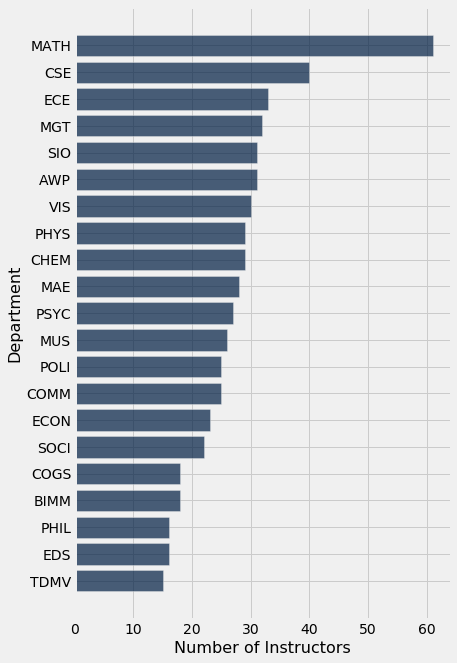

In [17]:
# 1. Sort the table in decreasing order of Number of Instructors.
sorted_department_table = department_table.sort('Number of Instructors', descending=True)

# 2. Drop the entries with fewer than X instructors per department.
min_instructors = 15
sorted_dropped_table = sorted_department_table.where('Number of Instructors', are.above_or_equal_to(min_instructors))

# 3. Display histogram horizontally: barh(y-axis, x-axis).
sorted_dropped_table.barh('Department', 'Number of Instructors')

### Matplotlib - Pie Chart

```python
# ----------------------EXAMPLE----------------------
# Source: https://pythonspot.com/matplotlib-pie-chart/

import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()
```

![Example Pie Char](./images/example_pie_chart.png)

### Visualizing # of Professors per Department

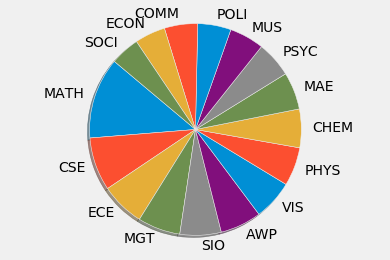

In [18]:
# 1. Drop the value with fewer than X instructors per department.
min_instructors = 20
sorted_dropped_table = sorted_department_table.where('Number of Instructors', are.above_or_equal_to(min_instructors))

# 2. Data to plot.
labels = sorted_dropped_table.column('Department')
sizes = sorted_dropped_table.column('Number of Instructors')
 
# 3. Plot
plt.pie(sizes, labels=labels, shadow=True, startangle=140)
plt.axis('equal')
plt.show()